In [97]:
# Load libaries
import matplotlib.pyplot as plt 
from mplsoccer.pitch import Pitch
import pandas as pd 
import numpy as np
import requests
import warnings
from pandas.errors import PerformanceWarning

warnings.simplefilter(action='ignore', category=PerformanceWarning)


Connect to the datasource


In [82]:
# load all matchs in events
events = requests.get("https://raw.githubusercontent.com/statsbomb/open-data/refs/heads/master/data/events/18244.json")
events = events.json()

Transform Data into dataframe

In [83]:
# Transform json into dataframe
data = pd.json_normalize(events)
# Displaying all columns for wide dataframe
# pd.set_option("display.max.columns",None)
data.head()
data.tail()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,ball_recovery.recovery_failure,pass.cut_back,bad_behaviour.card.id,bad_behaviour.card.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,50_50.outcome.id,50_50.outcome.name
3395,553ec774-2219-41cc-bb23-0c78217aae8d,3396,2,00:48:36.139,93,36,183,0.000000,21,Foul Won,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3396,9e5dde0d-81cb-4152-b572-756b3c49f47e,3397,2,00:48:55.067,93,55,184,2.275645,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3397,78e48f71-f9bb-46d8-8f27-2fa83c168c41,3398,2,00:48:57.343,93,57,184,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3398,7871c89b-c0d8-4c03-bfb1-f3a23aa77b93,3399,2,00:49:01.679,94,1,184,0.000000,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3399,105c26bf-7bcf-4f31-b043-41c18673fe73,3400,2,00:49:01.679,94,1,184,0.000000,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


showing off columns

In [84]:
data.columns.tolist()

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'duration',
 'type.id',
 'type.name',
 'possession_team.id',
 'possession_team.name',
 'play_pattern.id',
 'play_pattern.name',
 'team.id',
 'team.name',
 'tactics.formation',
 'tactics.lineup',
 'related_events',
 'location',
 'player.id',
 'player.name',
 'position.id',
 'position.name',
 'pass.recipient.id',
 'pass.recipient.name',
 'pass.length',
 'pass.angle',
 'pass.height.id',
 'pass.height.name',
 'pass.end_location',
 'pass.type.id',
 'pass.type.name',
 'pass.body_part.id',
 'pass.body_part.name',
 'carry.end_location',
 'pass.outcome.id',
 'pass.outcome.name',
 'ball_receipt.outcome.id',
 'ball_receipt.outcome.name',
 'under_pressure',
 'counterpress',
 'dribble.outcome.id',
 'dribble.outcome.name',
 'off_camera',
 'foul_won.defensive',
 'pass.switch',
 'dribble.overrun',
 'duel.type.id',
 'duel.type.name',
 'duel.outcome.id',
 'duel.outcome.name',
 'pass.cross',
 'pass.assisted_shot_id',
 'pass.s

Filtering data 


In [85]:
# Data by team 
real_madrid_passes = data.loc[ (data["possession_team.name"]=="Real Madrid") & (data["type.name"]=='Pass') ]
real_madrid_passes.tail()
print(real_madrid_passes.loc[:,"pass.outcome.name"].value_counts())
print("Unsuccessful passes " ,real_madrid_passes.loc[:,"pass.outcome.name"].notna().sum())

print("Successful passes " ,real_madrid_passes.loc[:,"pass.outcome.name"].isna().sum())


pass.outcome.name
Incomplete          68
Out                  8
Unknown              5
Injury Clearance     2
Pass Offside         1
Name: count, dtype: int64
Unsuccessful passes  84
Successful passes  486


Draw a pitch 


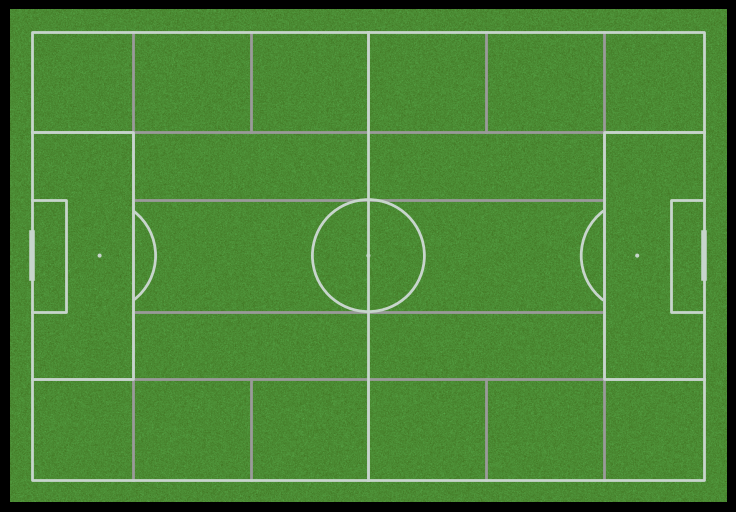

In [86]:
fig , ax = plt.subplots(figsize=(9.6,6.4))
fig.set_facecolor("black")
ax.patch.set_facecolor("black")

pitch = Pitch(pitch_type='statsbomb',positional=True,positional_color="#9A9A9A",
              pitch_color="grass",line_color="#c7d5cc")

pitch.draw(ax=ax)

Create pass map

Text(0.5, 1.0, 'Read madrid passes')

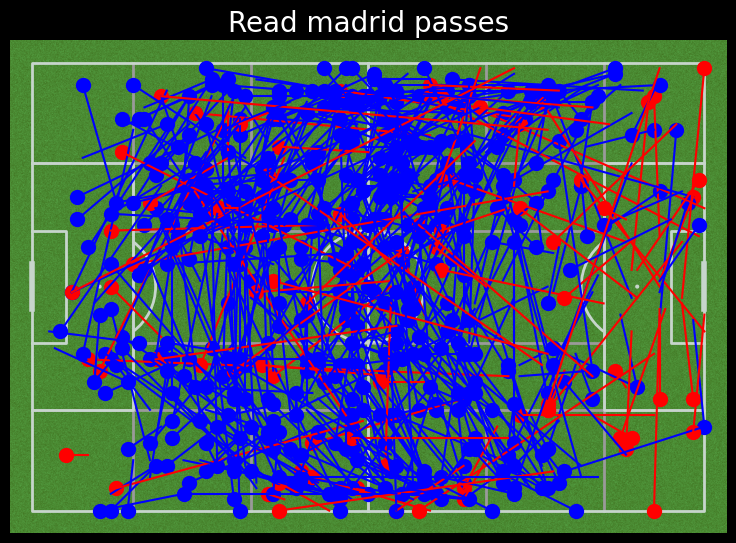

In [87]:
fig , ax = plt.subplots(figsize=(9.6,6.4))
fig.set_facecolor("black")
ax.patch.set_facecolor("black")

pitch = Pitch(pitch_type='statsbomb',positional=True,positional_color="#9A9A9A",
              pitch_color="grass",line_color="#c7d5cc")

pitch.draw(ax=ax)

for x in range(len(real_madrid_passes['id'])):
    # Period =1 1er mi-temps , 2 pour la deuxieme mi temps
    if real_madrid_passes["period"].iloc[x]==1 or real_madrid_passes["period"].iloc[x]==2 :
        if  any( [real_madrid_passes["pass.outcome.name"].iloc[x]=="Incomplete",
                   real_madrid_passes["pass.outcome.name"].iloc[x]=="Out",
                   real_madrid_passes["pass.outcome.name"].iloc[x]=="Injury Clearance",
                   real_madrid_passes["pass.outcome.name"].iloc[x]=="Pass Offside"]):
            """ on va utiliser the .plot pour desiner les lignes mel coordinates provided louta
              par exemple aatineha x(0.2) and y(1,3) , we'll draw line from 0 ->1 , 2->3
               """
            plt.plot(( real_madrid_passes["location"].iloc[x][0],real_madrid_passes["pass.end_location"].iloc[x][0]),\
                       ( real_madrid_passes["location"].iloc[x][1],real_madrid_passes["pass.end_location"].iloc[x][1]),color="red")
            plt.scatter(real_madrid_passes["location"].iloc[x][0],real_madrid_passes["location"].iloc[x][1],color="red",s=100)

        else:
            plt.plot(( real_madrid_passes["location"].iloc[x][0],real_madrid_passes["pass.end_location"].iloc[x][0]),\
                        (real_madrid_passes["location"].iloc[x][1],real_madrid_passes["pass.end_location"].iloc[x][1]),color="blue")
            plt.scatter(real_madrid_passes["location"].iloc[x][0],real_madrid_passes["location"].iloc[x][1],color="blue",s=100)


plt.title("Read madrid passes",color="white",size=20)

Filter map passes by player

Text(0.5, 1.0, 'Tony kroos passes')

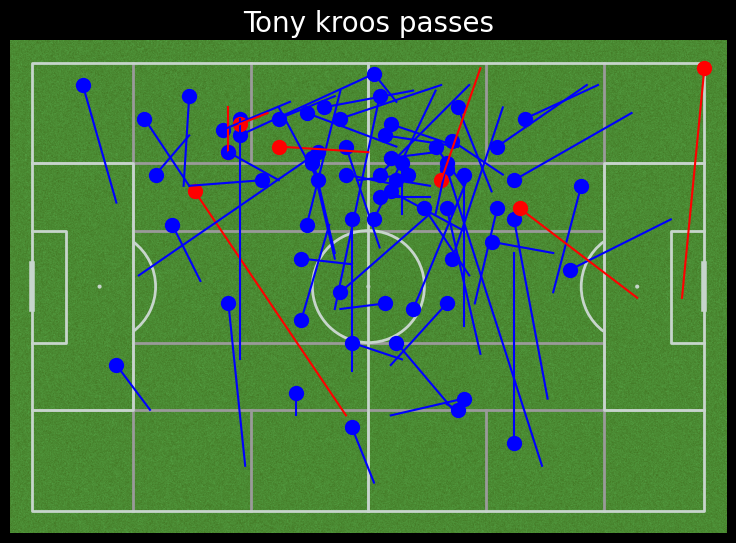

In [88]:
fig , ax = plt.subplots(figsize=(9.6,6.4))
fig.set_facecolor("black")
ax.patch.set_facecolor("black")

pitch = Pitch(pitch_type='statsbomb',positional=True,positional_color="#9A9A9A",
              pitch_color="grass",line_color="#c7d5cc")

pitch.draw(ax=ax)

for x in range(len(real_madrid_passes['id'])):
    # Period =1 1er mi-temps , 2 pour la deuxieme mi temps
    if ( (real_madrid_passes["period"].iloc[x]==1 or real_madrid_passes["period"].iloc[x]==2) 
                    and (real_madrid_passes["player.name"].iloc[x] in "Toni Kroos") ) :
        if  any( [real_madrid_passes["pass.outcome.name"].iloc[x]=="Incomplete",
                   real_madrid_passes["pass.outcome.name"].iloc[x]=="Out",
                   real_madrid_passes["pass.outcome.name"].iloc[x]=="Injury Clearance",
                   real_madrid_passes["pass.outcome.name"].iloc[x]=="Pass Offside"]):
            """ on va utiliser the .plot pour desiner les lignes mel coordinates provided louta
              par exemple aatineha x(0.2) and y(1,3) , we'll draw line from 0 ->1 , 2->3
               """
            plt.plot(( real_madrid_passes["location"].iloc[x][0],real_madrid_passes["pass.end_location"].iloc[x][0]),\
                       ( real_madrid_passes["location"].iloc[x][1],real_madrid_passes["pass.end_location"].iloc[x][1]),color="red")
            plt.scatter(real_madrid_passes["location"].iloc[x][0],real_madrid_passes["location"].iloc[x][1],color="red",s=100)

        else:
            plt.plot(( real_madrid_passes["location"].iloc[x][0],real_madrid_passes["pass.end_location"].iloc[x][0]),\
                        (real_madrid_passes["location"].iloc[x][1],real_madrid_passes["pass.end_location"].iloc[x][1]),color="blue")
            plt.scatter(real_madrid_passes["location"].iloc[x][0],real_madrid_passes["location"].iloc[x][1],color="blue",s=100)


plt.title("Tony kroos passes",color="white",size=20)

In [89]:
print("Overall passes ",real_madrid_passes.count().tolist()[0])
print("Kroos passes :" ,(real_madrid_passes["player.name"]=="Toni Kroos").value_counts().tolist()[1])
print(f'% : {( (real_madrid_passes["player.name"]=="Toni Kroos").value_counts().tolist()[1] / real_madrid_passes.count().tolist()[0] ) *100:.2f}')


Overall passes  570
Kroos passes : 73
% : 12.81


Create a shotsmap

In [90]:
real_madrid_shots = data.loc[ (data["possession_team.name"]=="Real Madrid") & (data["type.name"]=='Shot') ]
real_madrid_shots.tail()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,ball_recovery.recovery_failure,pass.cut_back,bad_behaviour.card.id,bad_behaviour.card.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,50_50.outcome.id,50_50.outcome.name
2870,e5ec23b5-6171-4f08-b35e-38f582e9d177,2871,2,00:29:41.846,74,41,158,0.765747,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3286,9bbcb11b-604d-43db-90a8-b19f29403e17,3287,2,00:44:42.993,89,42,179,0.469519,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,b5dd76c7-aa5d-4e7c-9686-e701b8310790,3299,2,00:44:52.323,89,52,179,0.634284,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3332,e4b1cf0c-c80a-4618-94f8-04a6696aa113,3333,2,00:47:14.830,92,14,182,0.227400,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3384,0bd1fb08-0f93-4241-87af-7bee510c5206,3385,2,00:48:10.498,93,10,182,0.326637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
print(real_madrid_shots.loc[:,"shot.outcome.name"].value_counts())
print("Unsuccessful shots " ,real_madrid_shots.loc[:,"shot.outcome.name"].notna().sum())

print("Successful shots " ,(real_madrid_shots.loc[:,"shot.outcome.name"]=="Goal").sum())

shot.outcome.name
Blocked    7
Off T      5
Goal       4
Wayward    1
Saved      1
Name: count, dtype: int64
Unsuccessful shots  18
Successful shots  4


Text(0.5, 1.0, 'Read madrid shots')

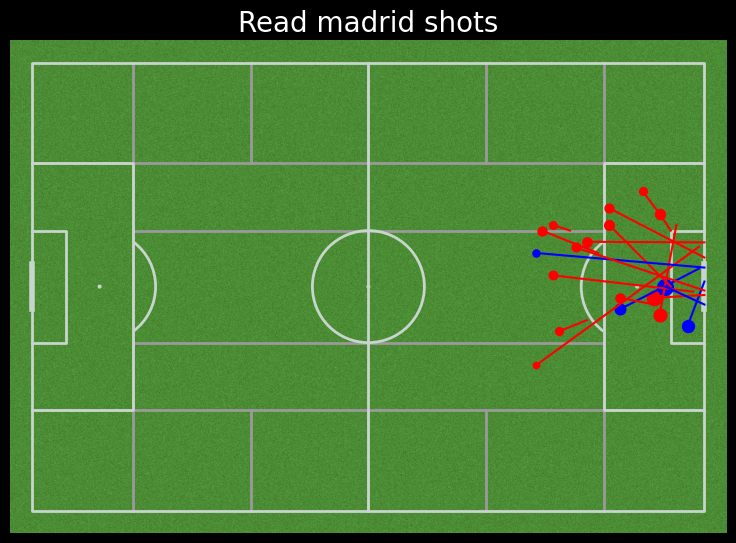

In [92]:
fig , ax = plt.subplots(figsize=(9.6,6.4))
fig.set_facecolor("black")
ax.patch.set_facecolor("black")

pitch = Pitch(pitch_type='statsbomb',positional=True,positional_color="#9A9A9A",
              pitch_color="grass",line_color="#c7d5cc")

pitch.draw(ax=ax)

for x in range(len(real_madrid_shots['id'])):
    # Period =1 1er mi-temps , 2 pour la deuxieme mi temps
    if real_madrid_shots["period"].iloc[x]==1 or real_madrid_shots["period"].iloc[x]==2 :
        size=np.sqrt(real_madrid_shots["shot.statsbomb_xg"].iloc[x]) * 200
        if (real_madrid_shots["shot.outcome.name"].iloc[x]=="Goal"):
            plt.plot(( real_madrid_shots["location"].iloc[x][0],real_madrid_shots["shot.end_location"].iloc[x][0]),\
                        (real_madrid_shots["location"].iloc[x][1],real_madrid_shots["shot.end_location"].iloc[x][1]),color="blue")
            plt.scatter(real_madrid_shots["location"].iloc[x][0],real_madrid_shots["location"].iloc[x][1],color="blue",s=size)




        else:
        
                 """ on va utiliser the .plot pour desiner les lignes mel coordinates provided louta
                 par exemple aatineha x(0.2) and y(1,3) , we'll draw line from 0 ->1 , 2->3
                 """
           
                 plt.plot(( real_madrid_shots["location"].iloc[x][0],real_madrid_shots["shot.end_location"].iloc[x][0]),\
                       ( real_madrid_shots["location"].iloc[x][1],real_madrid_shots["shot.end_location"].iloc[x][1]),color="red")
                 plt.scatter(real_madrid_shots["location"].iloc[x][0],real_madrid_shots["location"].iloc[x][1],color="red",s=size)

        


plt.title("Read madrid shots",color="white",size=20)

Create possession chart

In [93]:
import copy

poss_df = copy.copy(data)
poss_df.head()



,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,ball_recovery.recovery_failure,pass.cut_back,bad_behaviour.card.id,bad_behaviour.card.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,50_50.outcome.id,50_50.outcome.name
0,0436bcd0-e185-48c4-a6a8-1e7bc61d1032,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e2711d47-5d90-4967-b531-5aa74ac03a20,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7910a233-ec39-4332-9c39-f647bb837438,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5dfef236-0be2-4c92-a814-9f07c23418af,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,da4e9849-f967-420b-9f34-bb3ea489aa40,5,1,00:00:01.235,0,1,2,1.673145,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# inverting possession for the other team and making it negative 

# Limit columns and rows displayed
pd.set_option('display.max_columns', 20)  # limit columns
pd.set_option('display.max_rows', 30)     # limit rows

# Prevent long text values from expanding the layout
pd.set_option('display.max_colwidth', 100)


for x in range (len(poss_df['index'])):
    if (poss_df["possession_team.name"].iloc[x]=="Real Madrid"):
        poss_df[x,"duration"] = poss_df.duration.iloc[x]*(-1)


poss_df.tail()


,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,"(3386, duration)","(3387, duration)","(3388, duration)","(3389, duration)","(3390, duration)","(3391, duration)","(3396, duration)","(3397, duration)","(3398, duration)","(3399, duration)"
3395,553ec774-2219-41cc-bb23-0c78217aae8d,3396,2,00:48:36.139,93,36,183,0.000000,21,Foul Won,...,-0.0,-4.155138,NaN,-1.750334,-0.0,-0.0,-2.275645,NaN,-0.0,-0.0
3396,9e5dde0d-81cb-4152-b572-756b3c49f47e,3397,2,00:48:55.067,93,55,184,2.275645,30,Pass,...,-0.0,-4.155138,NaN,-1.750334,-0.0,-0.0,-2.275645,NaN,-0.0,-0.0
3397,78e48f71-f9bb-46d8-8f27-2fa83c168c41,3398,2,00:48:57.343,93,57,184,NaN,42,Ball Receipt*,...,-0.0,-4.155138,NaN,-1.750334,-0.0,-0.0,-2.275645,NaN,-0.0,-0.0
3398,7871c89b-c0d8-4c03-bfb1-f3a23aa77b93,3399,2,00:49:01.679,94,1,184,0.000000,34,Half End,...,-0.0,-4.155138,NaN,-1.750334,-0.0,-0.0,-2.275645,NaN,-0.0,-0.0
3399,105c26bf-7bcf-4f31-b043-41c18673fe73,3400,2,00:49:01.679,94,1,184,0.000000,34,Half End,...,-0.0,-4.155138,NaN,-1.750334,-0.0,-0.0,-2.275645,NaN,-0.0,-0.0


In [95]:
print(poss_df["team.name"].unique()[0])

Juventus


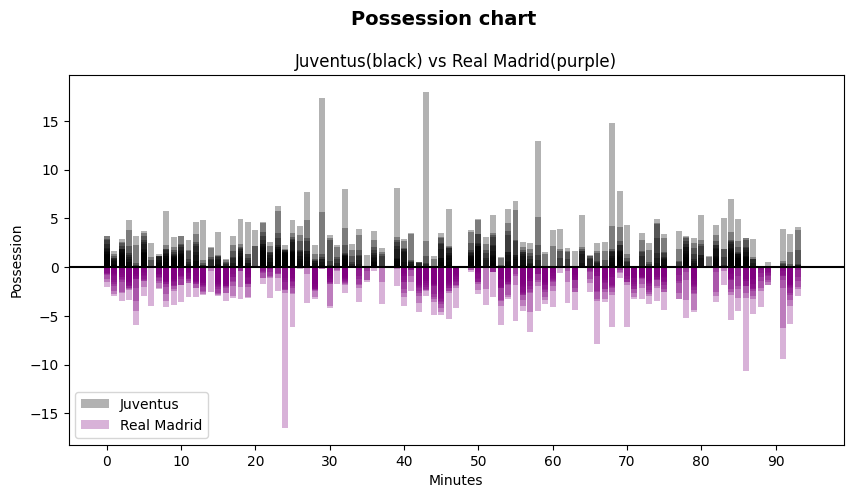

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))

fig.subplots_adjust(top=0.85)
#
juve = poss_df["team.name"].unique()[0]
rm = poss_df["team.name"].unique()[1]

juve_poss = poss_df[poss_df["team.name"]==juve]
rm_poss = poss_df[poss_df["team.name"]==rm]


# Setting titles for the figures and subplot respectivement 
fig.suptitle("Possession chart", fontsize=14,fontweight="bold")
ax.set_title(poss_df["team.name"][0]+'(black)'+" vs "+poss_df["team.name"][1]+"(purple)")



ax.set_xlabel("Minutes")
ax.set_ylabel("Possession")
plt.axhline(0,color="black")


ax.bar(juve_poss["minute"],juve_poss["duration"],color="black",alpha=0.3,label=juve)
ax.bar(rm_poss["minute"],-rm_poss["duration"],color="purple",alpha=0.3,label=rm)


tot_min= poss_df["minute"].max()
ax.set_xticks(np.arange(0,tot_min+1,step=10))

ax.legend()